# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('cardio_train.csv', delimiter=';')

In [3]:
print(F"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Dataset has 70000 rows and 13 columns


In [4]:
print("FIrst 5 rows of dataset")
data.head()

FIrst 5 rows of dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns="id",inplace=True)

In [9]:
print("Overall summary of numerical columns")
data.describe()

Overall summary of numerical columns


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.quantile(1-0.02, axis = 0)


age            23417.0
gender             2.0
height           181.0
weight           110.0
ap_hi            170.0
ap_lo            110.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
Name: 0.98, dtype: float64

In [11]:
print(F"minimum weight = {data['weight'].min()} kg ")
print(F"minimum height = {data['height'].min()} cm")

minimum weight = 10.0 kg 
minimum height = 55 cm


In [12]:
x = data.copy(deep=True)
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
print("melted dataset")
x_std.head()

melted dataset


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0
1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1
3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1
4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0


In [13]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted


,cardio,features,value
0,0,age,-0.436058
1,1,age,0.307684
2,1,age,-0.247995
3,1,age,-0.748147
4,0,age,-0.808538
...,...,...,...
349995,0,ap_lo,-0.088238
349996,1,ap_lo,-0.035180
349997,1,ap_lo,-0.035180
349998,1,ap_lo,-0.088238


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'ap_hi'),
  Text(4, 0, 'ap_lo')])

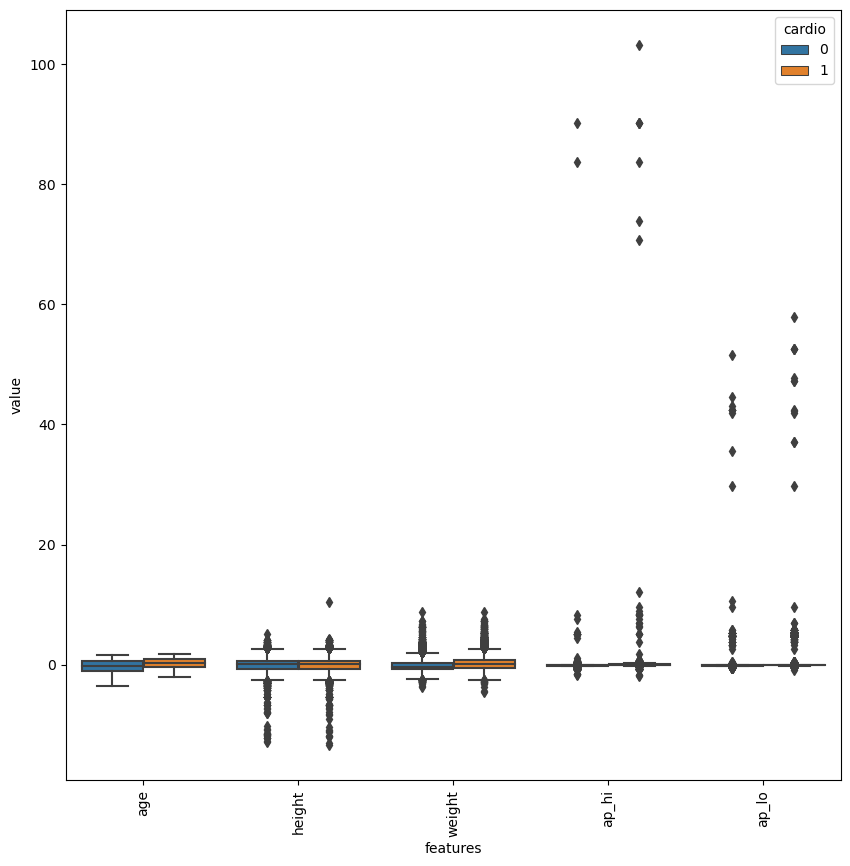

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

In [15]:
data.drop(data[(data['height'] > 213) | (data['height'] < 100)].index,inplace=True)
data.drop(data[(data['weight'] < 25)].index,inplace=True)

print(data.shape)

(69965, 12)


In [16]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1231 cases


In [17]:
data.drop(data[(data['ap_hi'] > 210) | (data['ap_hi'] < 80)].index,inplace=True)
data.drop(data[(data['ap_lo'] > 150) | (data['ap_lo'] < 50)].index,inplace=True)

print(data.shape)

(68661, 12)


In [18]:
data["male"] = data["gender"] == 2
data["female"] = data["gender"] == 1

data = data.astype({"male" : "int8", "female" : "int8"})

In [19]:
data['bmi'] = data['weight'] / ((data['height']/100) ** 2)
data.drop(['weight', 'height'], axis=1, inplace= True)

In [20]:
data['bpc'] = 0

data.loc[(data['ap_hi'] < 120) & (data['ap_lo'] < 80), 'bpc'] = 1

data.loc[((data['ap_hi'] >= 120) & (data['ap_hi'] < 130)) &
         ((data['ap_lo'] < 80)), 'bpc'] = 2

data.loc[((data['ap_hi'] >= 130) & (data['ap_hi'] < 140)) |
         ((data['ap_lo'] >= 80) & (data['ap_lo'] < 90)), 'bpc'] = 3

data.loc[((data['ap_hi'] >= 140) & (data['ap_hi'] < 180)) |
         ((data['ap_lo'] >= 90) & (data['ap_lo'] < 120)), 'bpc'] = 4

data.loc[(data['ap_hi'] >= 180) | (data['ap_lo'] >= 120), 'bpc'] = 5

cols_ap_ = ['ap_hi', 'ap_lo']
data.drop(cols_ap_, axis= 1, inplace= True)

In [21]:
data.to_csv("cardio_preprocessed_data.csv", index = False)

In [22]:
data

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,male,female,bmi,bpc
0,18393,2,1,1,0,0,1,0,1,0,21.967120,3
1,20228,1,3,1,0,0,1,1,0,1,34.927679,4
2,18857,1,3,1,0,0,0,1,0,1,23.507805,3
3,17623,2,1,1,0,0,1,1,1,0,28.710479,4
4,17474,1,1,1,0,0,0,0,0,1,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,1,1,1,0,1,0,1,0,26.927438,3
69996,22601,1,2,2,0,0,1,1,0,1,50.472681,4
69997,19066,2,3,1,0,1,0,1,1,0,31.353579,5
69998,22431,1,1,2,0,0,0,1,0,1,27.099251,3


# Analysis and Visualizations

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('dark')

my_palette = ['#02c39a',
              '#ff006e',
              '#ffe74c',
              '#8338ec',
              '#3a86ff',
              '#e07a5f',
              '#525252']

sns.set_palette(my_palette, 7)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn')

In [24]:
data = pd.read_csv("cardio_preprocessed_data.csv")

print(data.shape)


(68661, 12)


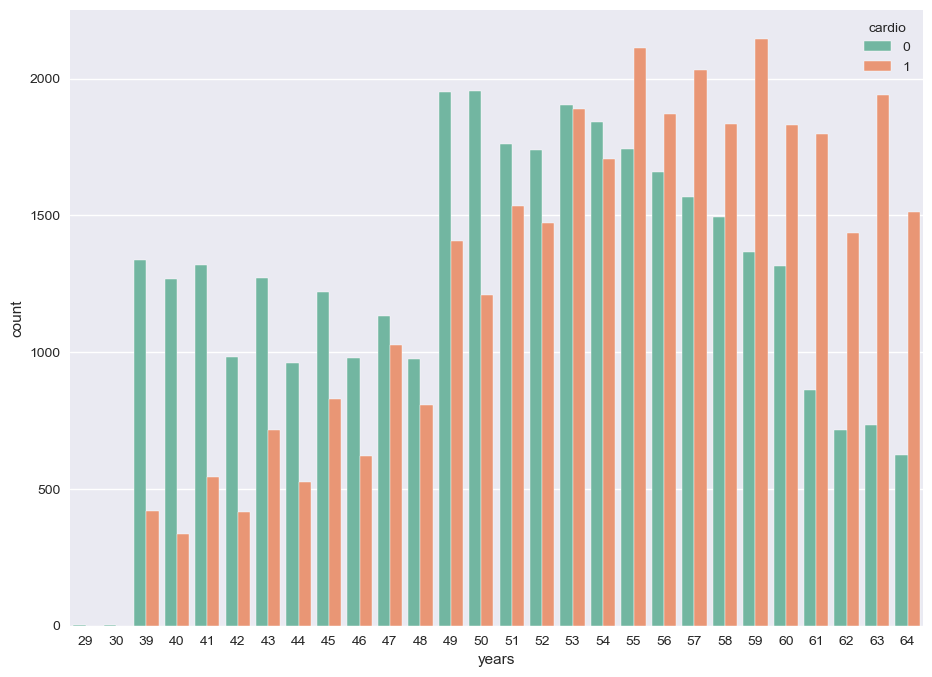

In [25]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age'] / 365).astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

In [26]:
print('Let us now get a quick summary of features available.')
data.describe().T.round(2)

Let us now get a quick summary of features available.


,count,mean,std,min,25%,50%,75%,max
age,68661.0,19464.23,2467.95,10798.00,17658.00,19701.00,21323.00,23713.00
gender,68661.0,1.35,0.48,1.00,1.00,1.00,2.00,2.00
cholesterol,68661.0,1.36,0.68,1.00,1.00,1.00,1.00,3.00
gluc,68661.0,1.23,0.57,1.00,1.00,1.00,1.00,3.00
smoke,68661.0,0.09,0.28,0.00,0.00,0.00,0.00,1.00
alco,68661.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
active,68661.0,0.80,0.40,0.00,1.00,1.00,1.00,1.00
cardio,68661.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
male,68661.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
female,68661.0,0.65,0.48,0.00,0.00,1.00,1.00,1.00


In [27]:
data.drop("gender", axis = 1, inplace=True)

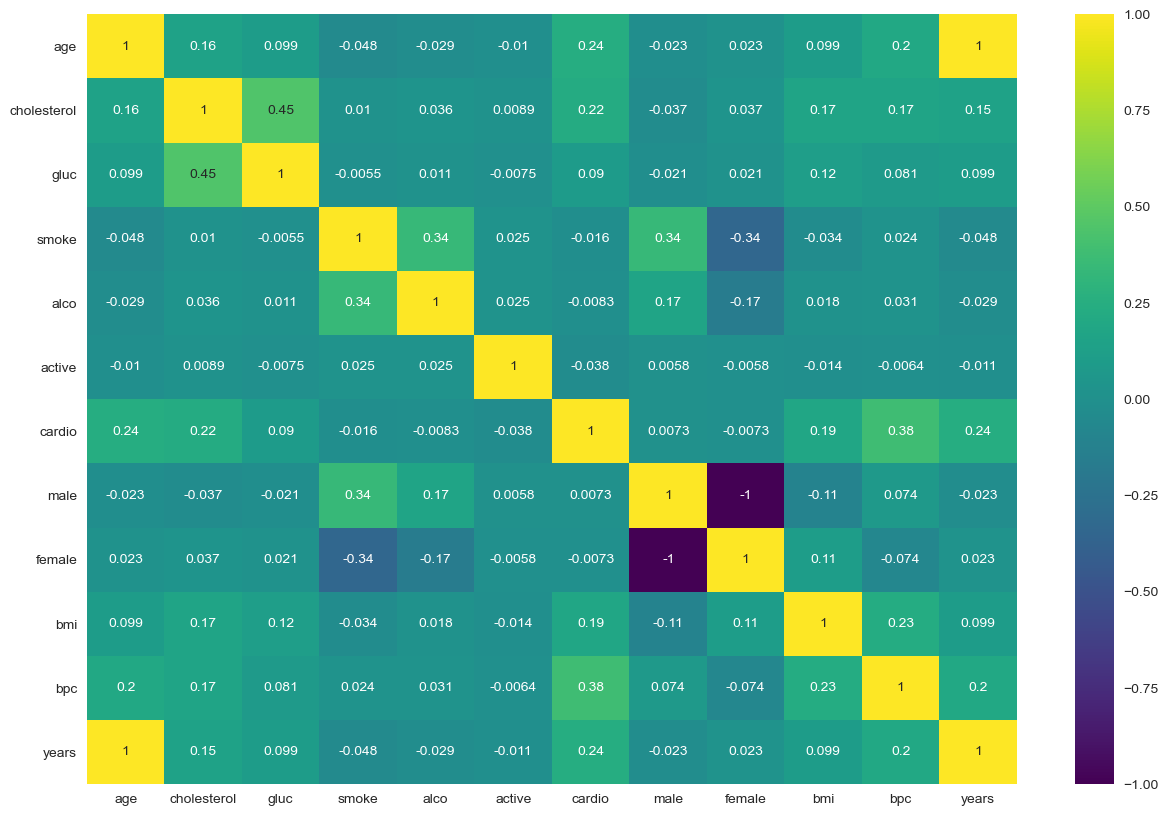

In [28]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(data.corr(), annot= True,
            cmap= 'viridis')
plt.show()

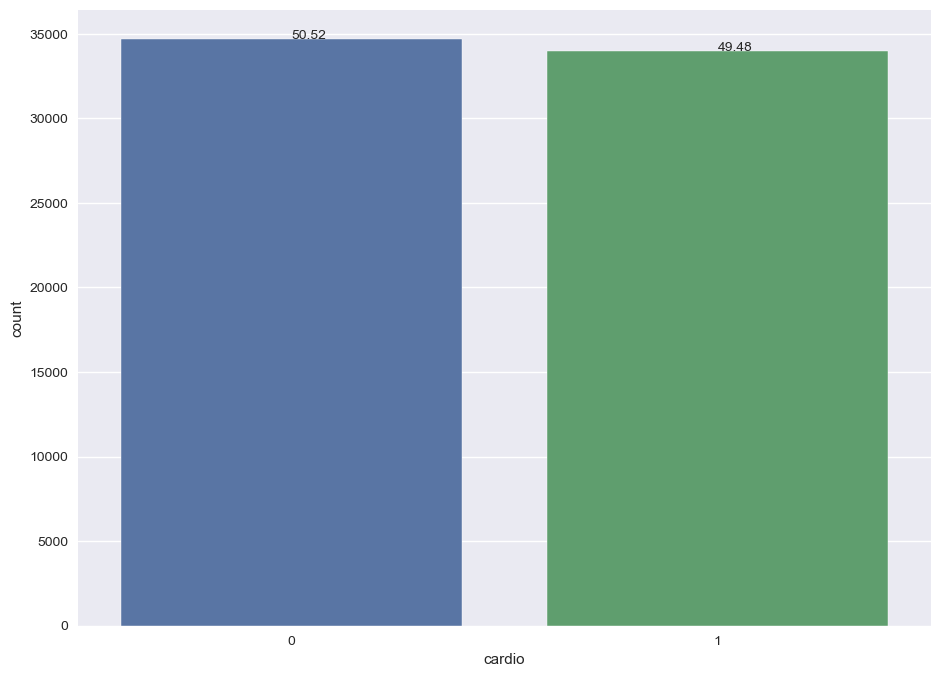

In [29]:
fig, ax = plt.subplots(1,1)
sns.countplot(data['cardio'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}'.format((i.get_height()/len(data['cardio']))*100,'%'))
plt.show()

In [30]:
# Age is given in days. Transforming it into years for better understanding and checking relation with the target variable.
data['age'] = data['age']/365

In [34]:
list(data)

['age',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'male',
 'female',
 'bmi',
 'bpc',
 'years']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


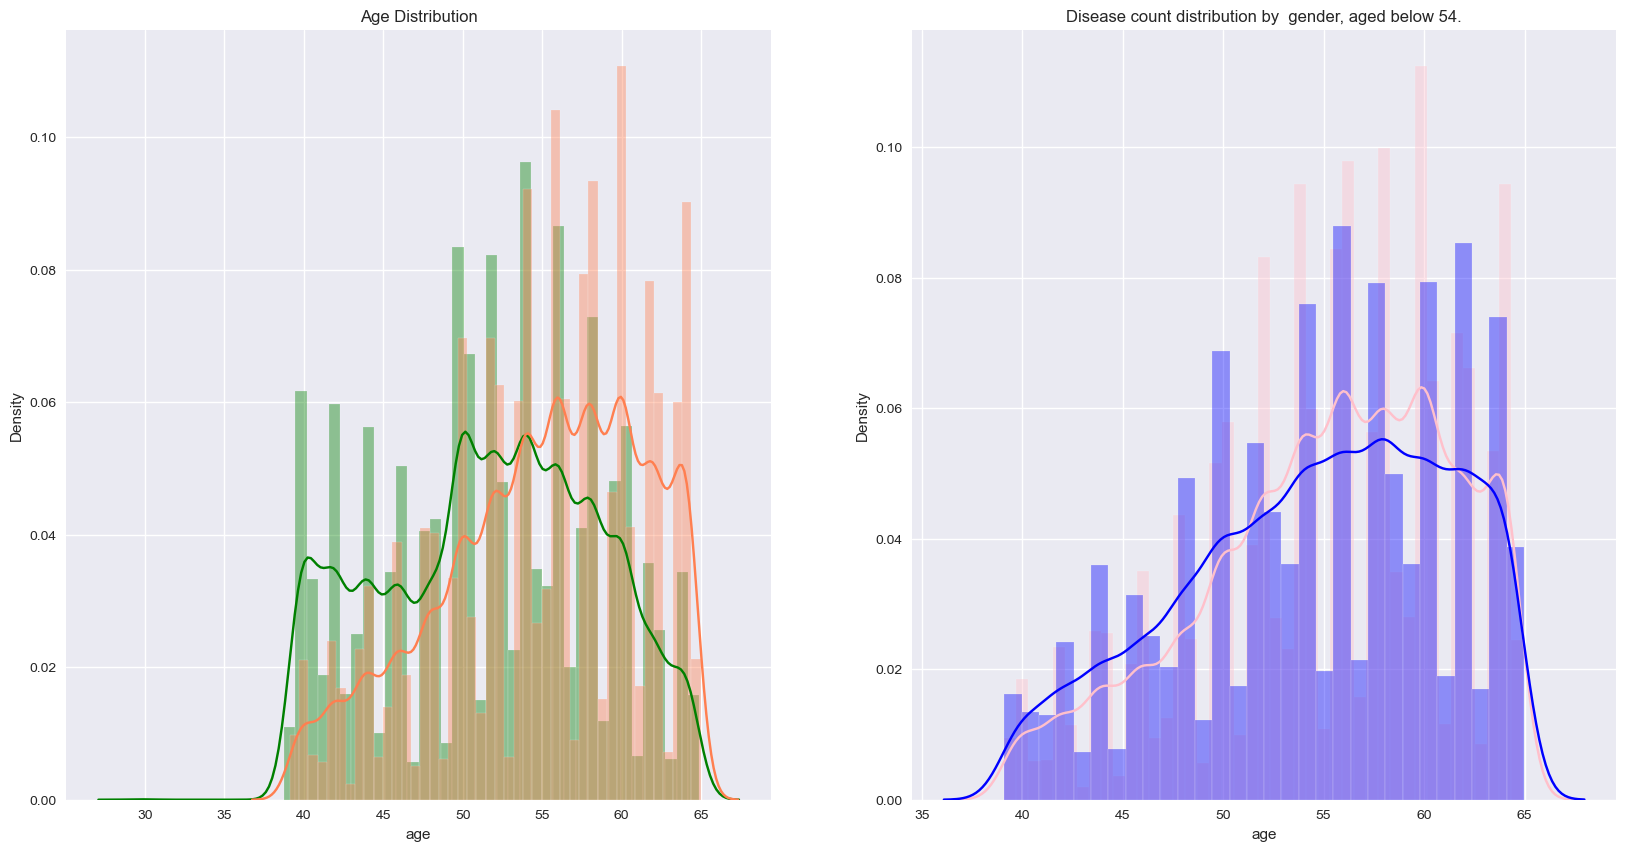

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data['age'][data['cardio']==0], ax = ax1, color='green')
sns.distplot(data['age'][data['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend()

sns.distplot(data['age'][(data['female']) & (data['cardio']==1)],ax = ax2,color='pink')
sns.distplot(data['age'][(data['male']) & (data['cardio']==1)],ax = ax2,color='blue')
ax2.set_title('Disease count distribution by  gender, aged below 54.')
plt.show()

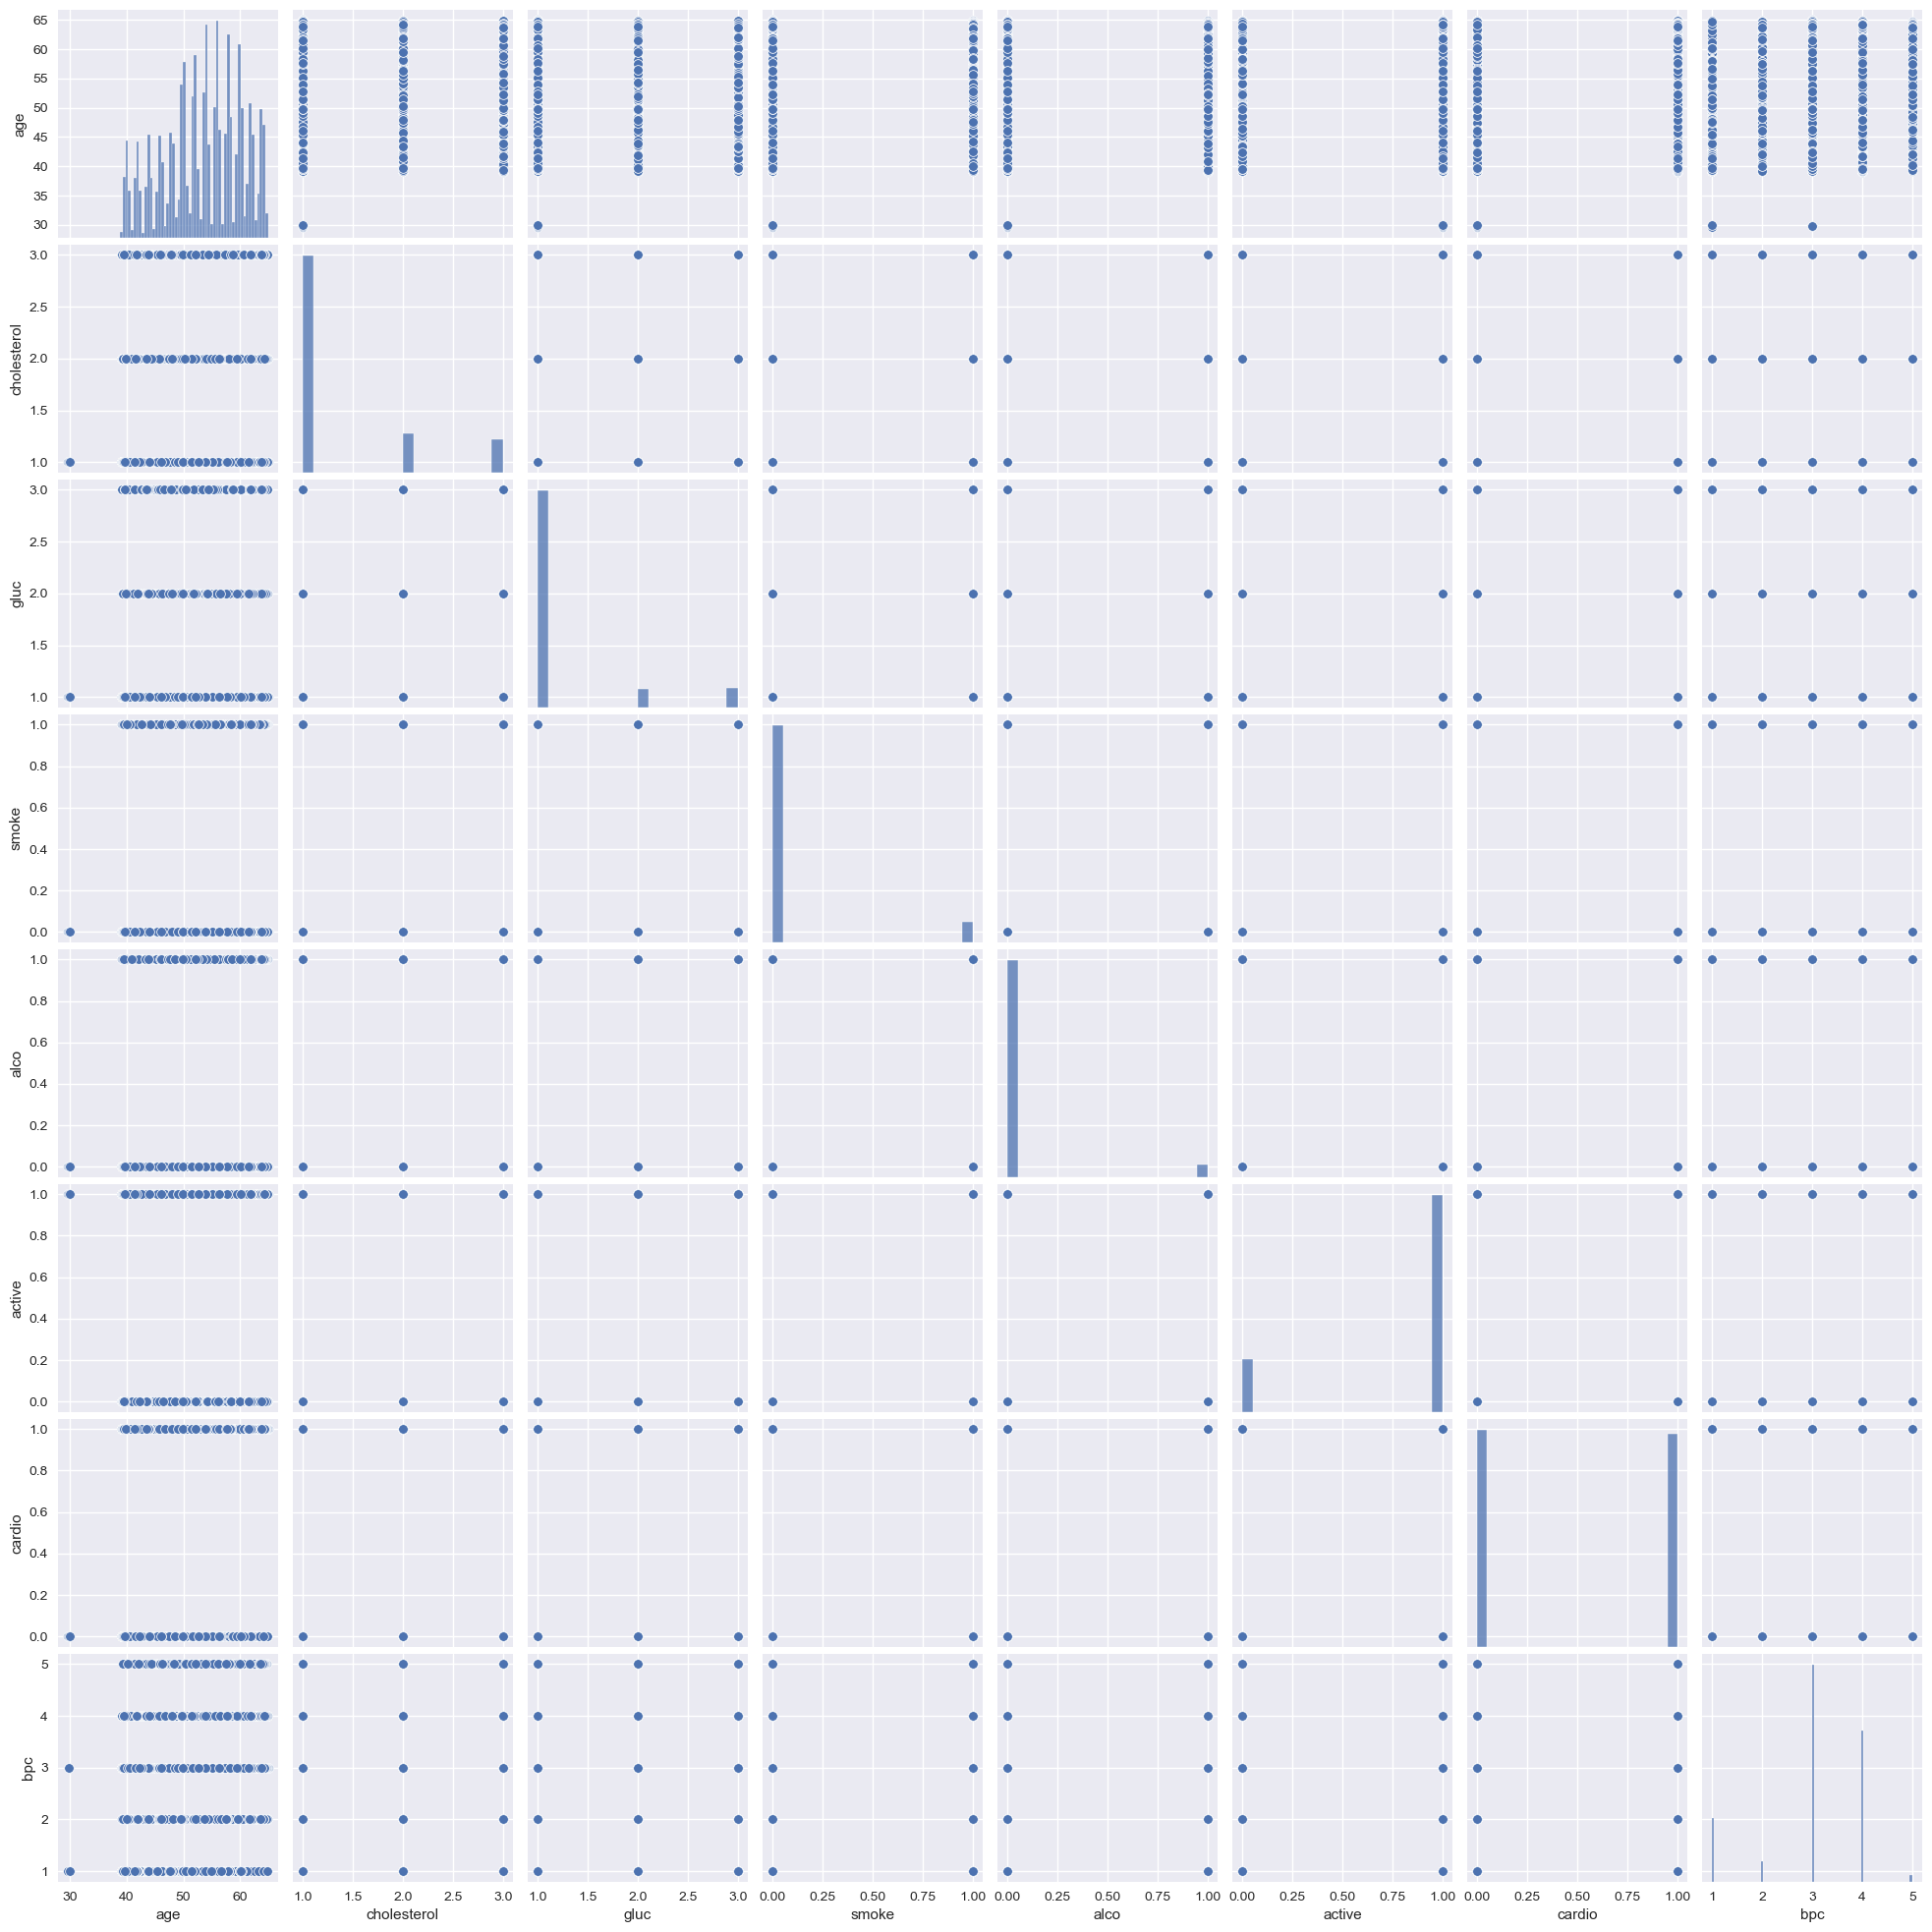

In [33]:
sns.pairplot(data[['age','cholesterol','gluc','smoke','alco','active','cardio','bpc']])
plt.show()

# Correlation

In [36]:
data.corr()

,age,cholesterol,gluc,smoke,alco,active,cardio,male,female,bmi,bpc,years
age,1.000000,0.155239,0.098965,-0.047583,-0.028718,-0.010468,0.239360,-0.023327,0.023327,0.099484,0.201512,0.999092
cholesterol,0.155239,1.000000,0.450967,0.010165,0.035539,0.008935,0.221347,-0.036510,0.036510,0.167248,0.166227,0.154856
gluc,0.098965,0.450967,1.000000,-0.005533,0.010798,-0.007470,0.089934,-0.020882,0.020882,0.116244,0.081475,0.098660
smoke,-0.047583,0.010165,-0.005533,1.000000,0.340049,0.025330,-0.016128,0.338888,-0.338888,-0.033544,0.023676,-0.047587
alco,-0.028718,0.035539,0.010798,0.340049,1.000000,0.024780,-0.008254,0.171482,-0.171482,0.018264,0.030878,-0.028794
active,-0.010468,0.008935,-0.007470,0.025330,0.024780,1.000000,-0.037653,0.005801,-0.005801,-0.014096,-0.006389,-0.010572
cardio,0.239360,0.221347,0.089934,-0.016128,-0.008254,-0.037653,1.000000,0.007296,-0.007296,0.186045,0.376007,0.239183
male,-0.023327,-0.036510,-0.020882,0.338888,0.171482,0.005801,0.007296,1.000000,-1.000000,-0.108632,0.073981,-0.023468
female,0.023327,0.036510,0.020882,-0.338888,-0.171482,-0.005801,-0.007296,-1.000000,1.000000,0.108632,-0.073981,0.023468
bmi,0.099484,0.167248,0.116244,-0.033544,0.018264,-0.014096,0.186045,-0.108632,0.108632,1.000000,0.233406,0.099332


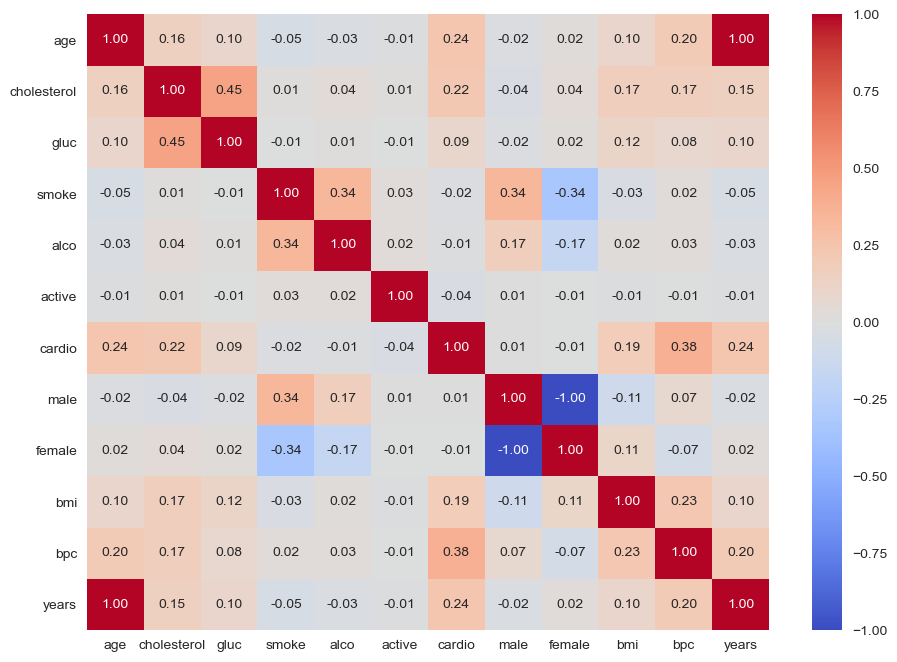

In [37]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## K-Nearest Neighbour

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from training_and_testing_data import X_trainset, X_testset, Y_trainset, Y_testset
from sklearn.neighbors import KNeighborsClassifier

In [40]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,Y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(Y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62761232, 0.6199665 , 0.65746741, 0.65812277, 0.68156994,
       0.6830991 , 0.69409452, 0.69700721, 0.70042962])

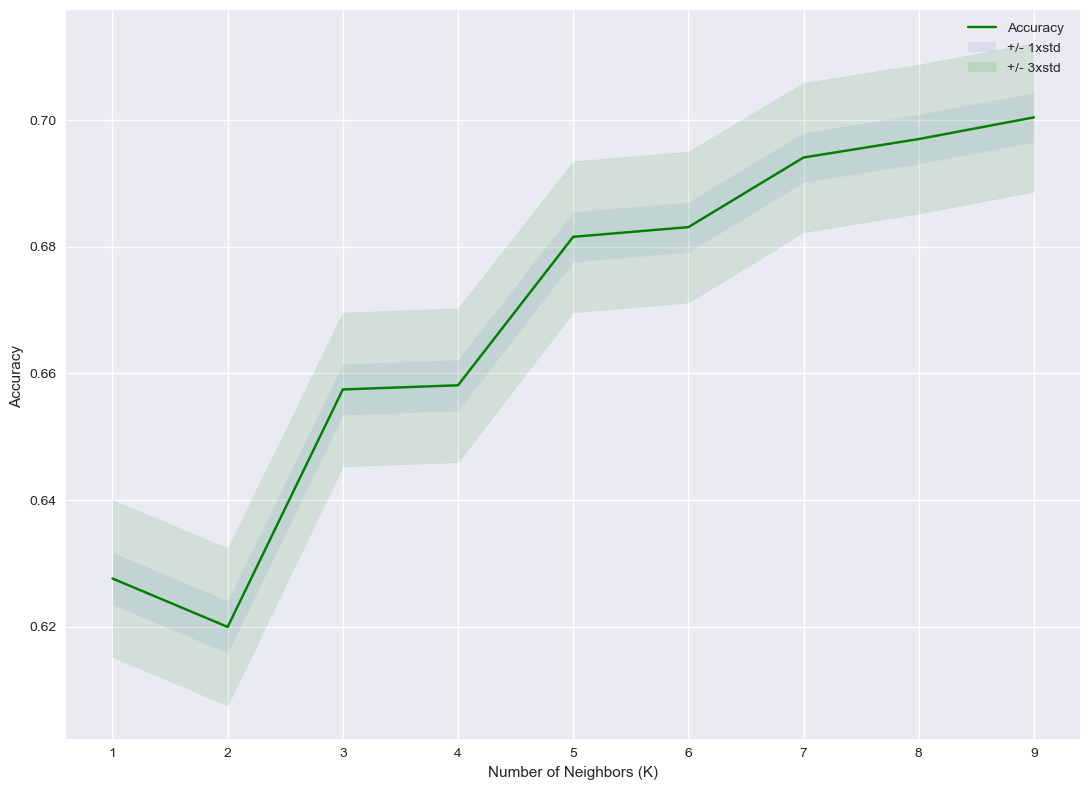

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7004296220782058 with k= 9


In [43]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,Y_trainset)

In [44]:
y_hat = neigh.predict(X_testset)

In [45]:
print(confusion_matrix(Y_testset,y_hat))
print(classification_report(Y_testset,y_hat))

[[4833 2052]
 [2062 4786]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6885
           1       0.70      0.70      0.70      6848

    accuracy                           0.70     13733
   macro avg       0.70      0.70      0.70     13733
weighted avg       0.70      0.70      0.70     13733



In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
cnf_matrix = confusion_matrix(Y_testset, y_hat)

Confusion matrix, without normalization
[[4833 2052]
 [2062 4786]]


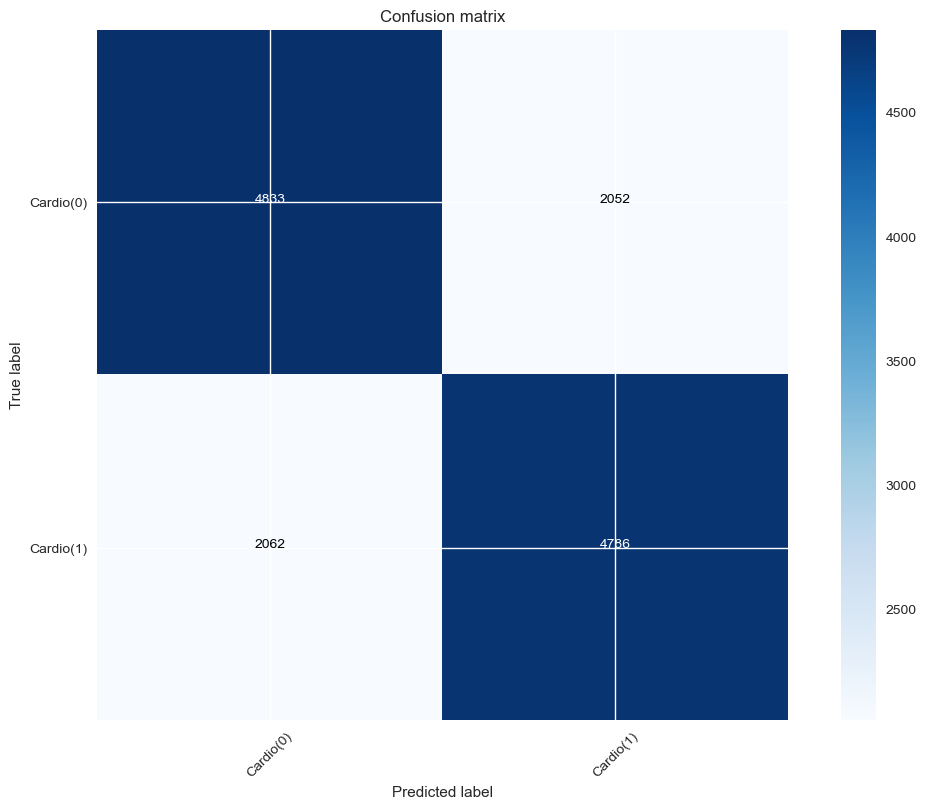

In [48]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cardio(0)','Cardio(1)'],normalize= False,  title='Confusion matrix')
plt.style.use("seaborn")

## Decision Tree

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from training_and_testing_data import X_trainset, X_testset, Y_trainset, Y_testset
from sklearn.tree import DecisionTreeClassifier

In [50]:
testtree = DecisionTreeClassifier(criterion="entropy", max_depth = None)

In [51]:
testtree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [52]:
predTree = testtree.predict(X_testset)

In [53]:
cnf_matrix = confusion_matrix(Y_testset,predTree)

print(confusion_matrix(Y_testset,predTree))
print(classification_report(Y_testset,predTree))

[[4299 2586]
 [2642 4206]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      6885
           1       0.62      0.61      0.62      6848

    accuracy                           0.62     13733
   macro avg       0.62      0.62      0.62     13733
weighted avg       0.62      0.62      0.62     13733



In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  


Confusion matrix
[[4299 2586]
 [2642 4206]]


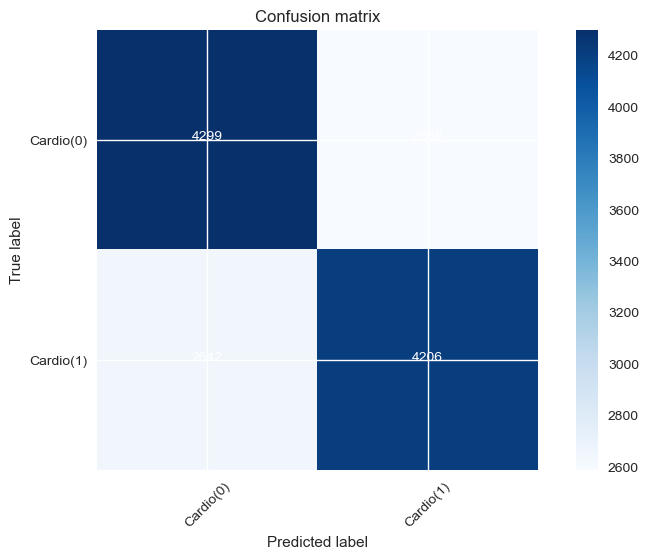

In [56]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cardio(0)','Cardio(1)'],normalize= False,  title='Confusion matrix')
plt.style.use("seaborn")

## Logistic Regression

In [57]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from training_and_testing_data import X_trainset, X_testset, Y_trainset, Y_testset

In [58]:
logistic_classifer=LogisticRegression(solver='liblinear')

In [59]:
logistic_classifer.fit(X_testset, Y_testset)

LogisticRegression(solver='liblinear')

In [60]:
y_hat = logistic_classifer.predict(X_testset)

In [61]:
print(confusion_matrix(Y_testset,y_hat))
print(classification_report(Y_testset,y_hat))

[[4779 2106]
 [1909 4939]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      6885
           1       0.70      0.72      0.71      6848

    accuracy                           0.71     13733
   macro avg       0.71      0.71      0.71     13733
weighted avg       0.71      0.71      0.71     13733



## Random Forest

In [62]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from training_and_testing_data import X_trainset, X_testset, Y_trainset, Y_testset

In [63]:
forest_clf=RandomForestClassifier(n_jobs=3)

In [64]:
forest_clf.fit(X_trainset,Y_trainset)

RandomForestClassifier(n_jobs=3)

In [65]:
y_hat=forest_clf.predict(X_testset)

In [66]:
print(confusion_matrix(Y_testset,y_hat))
print(classification_report(Y_testset,y_hat))

[[4746 2139]
 [2186 4662]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      6885
           1       0.69      0.68      0.68      6848

    accuracy                           0.69     13733
   macro avg       0.69      0.69      0.69     13733
weighted avg       0.69      0.69      0.69     13733



# Support Vector Machine

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
X = data.drop(columns='cardio', axis=1)
Y = data['cardio']

In [69]:
print(X)

             age  cholesterol  gluc  smoke  alco  active  male  female  \
0      50.391781            1     1      0     0       1     1       0   
1      55.419178            3     1      0     0       1     0       1   
2      51.663014            3     1      0     0       0     0       1   
3      48.282192            1     1      0     0       1     1       0   
4      47.873973            1     1      0     0       0     0       1   
...          ...          ...   ...    ...   ...     ...   ...     ...   
68656  52.712329            1     1      1     0       1     1       0   
68657  61.920548            2     2      0     0       1     0       1   
68658  52.235616            3     1      0     1       0     1       0   
68659  61.454795            1     2      0     0       0     0       1   
68660  56.273973            2     1      0     0       1     0       1   

             bmi  bpc  years  
0      21.967120    3     50  
1      34.927679    4     55  
2      23.507805  

In [70]:
print(Y)

0        0
1        1
2        1
3        1
4        0
        ..
68656    0
68657    1
68658    1
68659    1
68660    0
Name: cardio, Length: 68661, dtype: int64


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2)

In [72]:
len(X_train)

13732

In [73]:
len(X_test)

54929

In [74]:
len(Y_train)

13732

In [75]:
len(Y_test)

54929

In [76]:
from sklearn.svm import SVC
model=SVC()

In [77]:
model.fit(X_train,Y_train)

SVC()

In [78]:
model.score(X_test,Y_test)

0.6891805785650567

In [79]:
model.predict(X_train)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(68661, 11) (13732, 11) (54929, 11)


In [81]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [82]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6776871540926304


In [83]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [84]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6891805785650567


# ML Model

In [85]:
input_data = (18393,2,1,1,0,0,1,1,0,21.9671201814059,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Cardiovascular Disease')
else:
  print('The Person has Cardiovascular Disease')

[0]
The Person does not have a Cardiovascular Disease
